In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NnyVRPGwvwTbsUVgCLL8")
project = rf.workspace("yolo-spkie").project("activity-9-wsh2l")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Activity-9--1 in yolov8:: 100%|██████████| 19/19 [00:00<00:00, 2575.35it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!yolo task=detect mode=train model=yolo11n.pt data="/content/Activity-9--1/data.yaml" epochs=20 imgsz=640 batch=16 plots=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Activity-9--1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

In [7]:
import cv2
from ultralytics import YOLO
#import numpy as np
import matplotlib.pyplot as plt

In [9]:
!pip install pytesseract


image 1/1 /content/car.jpg: 1280x960 300 Carplates, 651.7ms
Speed: 18.2ms preprocess, 651.7ms inference, 75.7ms postprocess per image at shape (1, 3, 1280, 960)


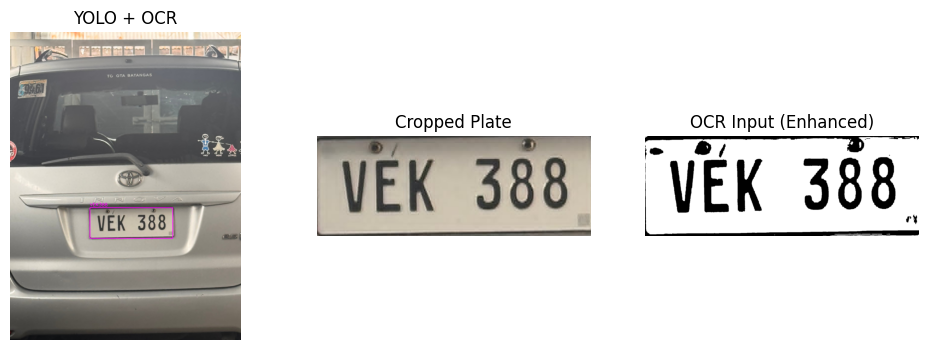

Extracted Plate Number: VEK388


In [17]:
from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Optional: Set path to Tesseract executable if needed
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Configuration
MODEL_PATH = "runs/detect/train3/weights/best.pt"
IMAGE_PATH = "car.jpg"
CONFIDENCE_THRESHOLD = 0.001
IMAGE_SIZE = 1280
IOU_THRESHOLD = 0.3
SHOW_DEBUG = True  # Set to False to disable visualization

# Load YOLO model
model = YOLO(MODEL_PATH)

def preprocess_for_ocr(roi):
    """Preprocess cropped license plate image for better OCR accuracy."""
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

    # Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)

    # Denoise and threshold
    gray = cv2.medianBlur(gray, 3)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh

def perform_ocr(image):
    """Run Tesseract OCR on preprocessed image."""
    config = r"--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    text = pytesseract.image_to_string(image, config=config)
    return text.strip()

def detect_and_read_plate(image_path):
    """Detect license plates using YOLO and read them using OCR."""
    results = model.predict(image_path, conf=CONFIDENCE_THRESHOLD, imgsz=IMAGE_SIZE, iou=IOU_THRESHOLD)

    # Read and prepare image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plate_number = ""

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            roi = img[y1:y2, x1:x2]

            # Preprocess and OCR
            ocr_input = preprocess_for_ocr(roi)
            plate_number = perform_ocr(ocr_input)

            # Draw pink box and label
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 3)  # Pink
            cv2.putText(img_rgb, plate_number, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 255), 2)  # Pink

            # Optional debug visualization
            if SHOW_DEBUG:
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.imshow(img_rgb)
                plt.title("YOLO + OCR")
                plt.axis("off")

                plt.subplot(1, 3, 2)
                plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                plt.title("Cropped Plate")
                plt.axis("off")

                plt.subplot(1, 3, 3)
                plt.imshow(ocr_input, cmap="gray")
                plt.title("OCR Input (Enhanced)")
                plt.axis("off")
                plt.show()

            return plate_number  # Only process the first detection

    return None

# ---- MAIN EXECUTION ----
if __name__ == "__main__":
    plate = detect_and_read_plate(IMAGE_PATH)
    if plate:
        print("Extracted Plate Number:", plate)
    else:
        print("No plate detected.")



image 1/1 /content/car2.jpg: 544x1280 (no detections), 458.9ms
Speed: 11.9ms preprocess, 458.9ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 1280)


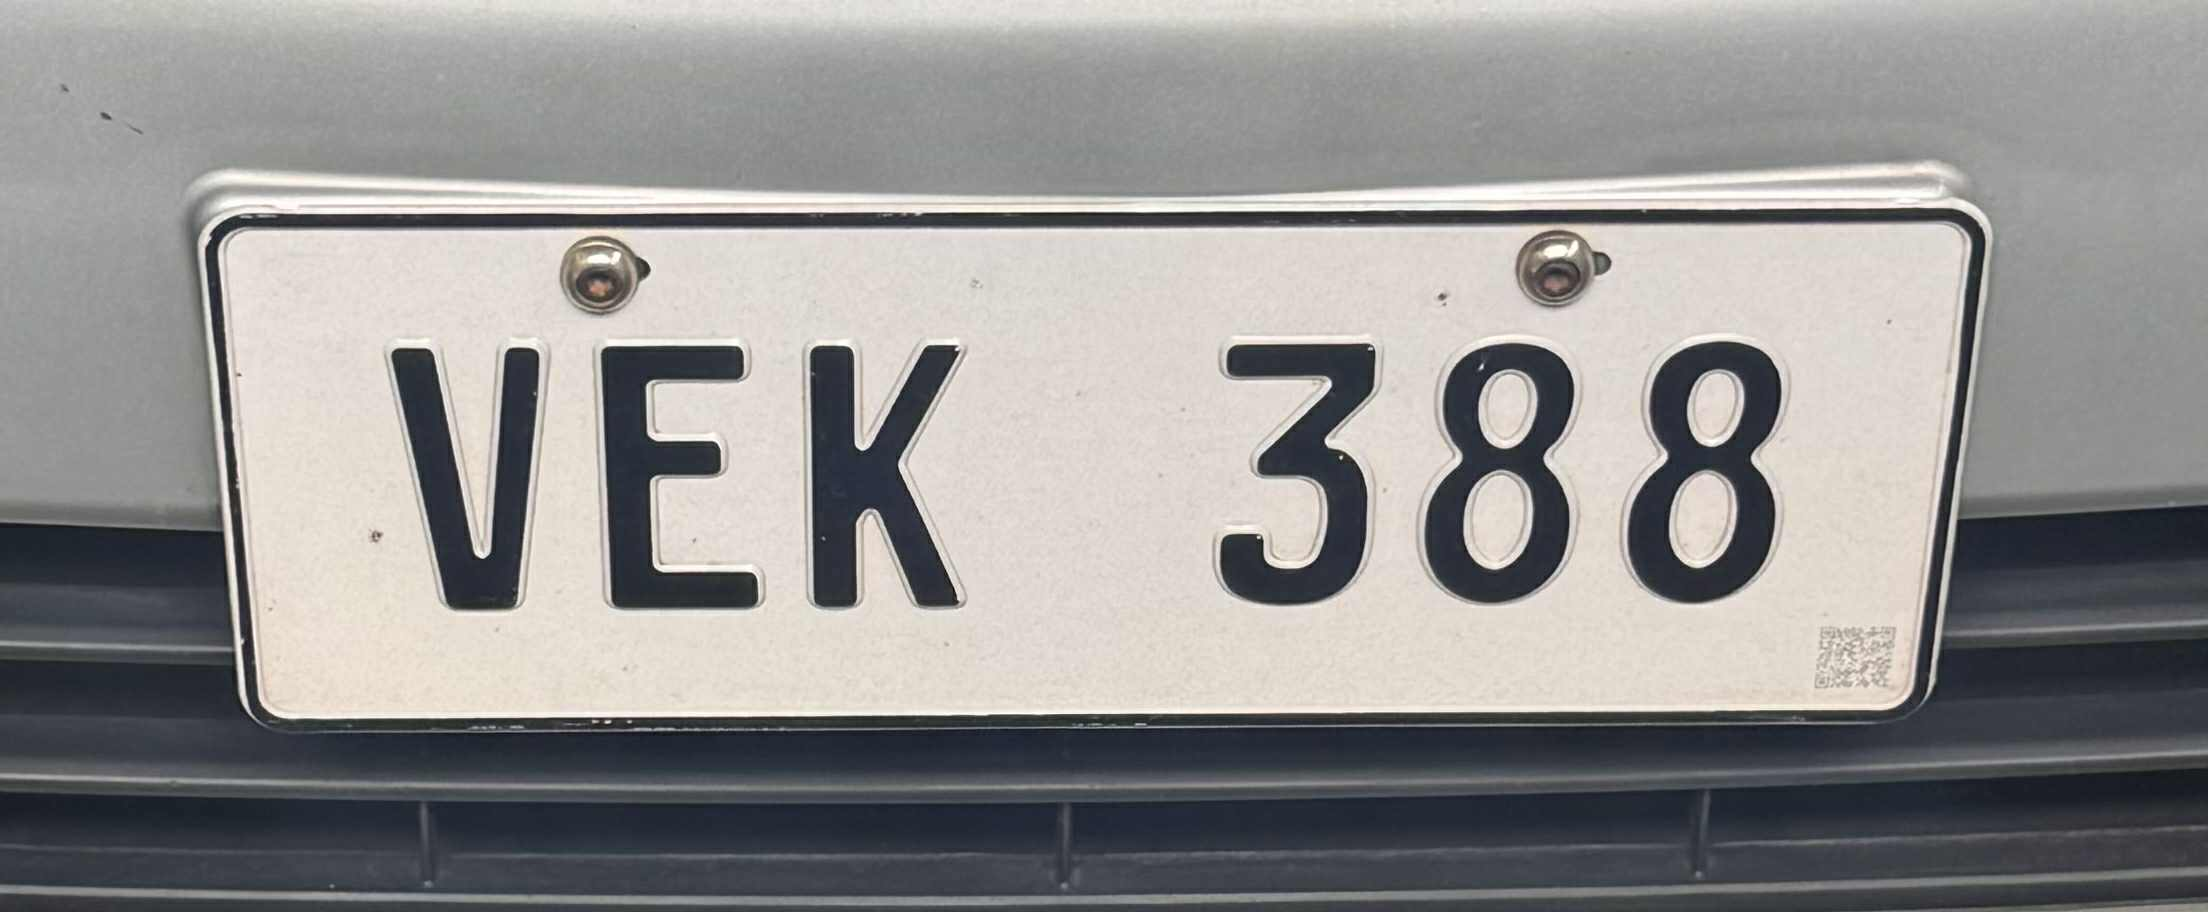

In [25]:
from ultralytics import YOLO

# Load model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run with lower conf + larger image size
results = model.predict("car2.jpg", conf=0.02, imgsz=1280, iou=0.3)

# Show detection
results[0].show()

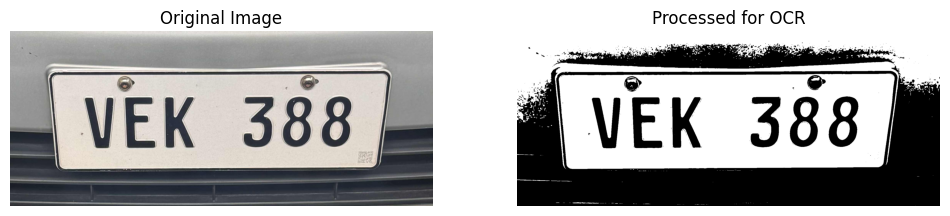

Extracted Text:
  



In [24]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# --- OPTIONAL: If tesseract is not in PATH, set the path manually ---
# For Windows, uncomment and adjust:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def ocr_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Morphological noise removal
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # OCR with Tesseract
    text = pytesseract.image_to_string(cleaned)

    # Show original and processed image inline (Jupyter)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(cleaned, cmap="gray")
    axs[1].set_title("Processed for OCR")
    axs[1].axis("off")

    plt.show()

    return text


# Example usage
text_output = ocr_image("car2.jpg")
print("Extracted Text:\n", text_output)
